In [2]:
from lgca import get_lgca
from lgca.helpers import *
import numpy as np
import matplotlib.pyplot as plt
import time
from os import environ as env
from uuid import uuid4 as uuid

def plot_averaged_entropies(sh, gi, hh, save=False, id=0):
    shan = sh
    hill2 = hh
    gini = gi
    tmax = len(sh)
    x = np.arange(0, tmax, 1)

    fig, host = plt.subplots()
    par1 = host.twinx()
    par2 = host.twinx()
    par2.spines["right"].set_position(("axes", 1.2))
    make_patch_spines_invisible(par2)
    par2.spines["right"].set_visible(True)

    p1, = host.plot(x, shan, "m", linewidth=0.7, label="Shannonindex")
    p2, = par1.plot(x, gini, "b", linewidth=0.7, label="GiniSimpsonindex")
    p3, = par2.plot(x, hill2, "c", linewidth=0.7, label="Hillnumber of order 2")

    host.set_xlim(0, tmax - 1)
    host.set_ylim(bottom=0)
    par1.set_ylim(bottom=0)
    par2.set_ylim(bottom=0)

    host.set_xlabel("timesteps")
    host.set_ylabel("Shannonindex")
    par1.set_ylabel("GiniSimpsonindex")
    par2.set_ylabel("Hillnumber of order 2")

    host.yaxis.label.set_color(p1.get_color())
    par1.yaxis.label.set_color(p2.get_color())
    par2.yaxis.label.set_color(p3.get_color())

    tkw = dict(size=4, width=1.5)
    host.tick_params(axis='y', colors=p1.get_color(), **tkw)
    par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
    par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
    host.tick_params(axis='x', **tkw)

    lines = [p1, p2, p3]

    host.legend(lines, [l.get_label() for l in lines])
    plt.show()

    if save:
        filename = str(id) + '_comparing averaged sh, gi, hh' + '.jpg'
        plt.savefig(pathlib.Path('pictures').resolve() / filename, bbox_inches='tight')


In [19]:
# TODO: warum so gleich?

#namen:
variation = '1801_'
filename = '_21fb7db'
path = 'saved_data/pummelzeugs_1/'
rep = 5
save = False

#thom einlesen
thom = np.load(path + variation + '_thom.npy')
tmax = int(max(thom[:rep]))
print('tmax', tmax)

#shannon, ginisimpson, hill2
result_sh = np.zeros(tmax)
# result_gi = []
# result_hill2 = []

counter = np.zeros(tmax+1)

for i in range (rep):
    data = np.load(path + variation + str(i) + filename+ '_offsprings.npy')
    t = int(thom[i])
    counter[1:t+1] += 1
    
    #'shannon':
    shannon = entropies(props=data, order=1, off=True)[0]  
    if len(shannon) != t:
        print('ERROR')
    shannon = np.concatenate((shannon, np.zeros(tmax-t)))
    result_sh = result_sh + shannon
#     # 'ginisimpson':
#     gini = entropies(props=data_off, order=2, off=True)
#     gini = np.concatenate((gini, np.zeros(tmax-t)))
#     result_gi = result_gi + gini
#     # 'hill2':
#     hill =  hillnumber(props=data_off, order=2, off=True)
#     hill = np.concatenate((hill, np.zeros(tmax-t)))
#     result_hill2 = result_hill2 + hill
#     print('sh ohne', result_sh[240:246])

#Mitteln
for i in range(tmax):
    result_sh[i] = result_sh[i] / counter[i+1]
#     result_gi[i]= result_gi[i] / counter[i+1]
#     result_hill2[i] = result_hill2[i] / counter[i+1]
# print('sh mit', result_sh[240:246])
# print(counter)

#speichern
if save:
    np.save('saved_data/' + variation + '_' + 'shannon' +'.npy', result_sh)
    np.save('saved_data/' + variation + '_' + 'gini' +'.npy', result_gi)
    np.save('saved_data/' + variation + '_' + 'hill2' +'.npy', result_hill2)

#plot
# plot_averaged_entropies(sh=result_sh, gi=result_gi, hh=result_hill2, save=False)

tmax 13653


In [41]:
print(counter[243], counter[244])
print(len(counter))

3.0 1.0
262


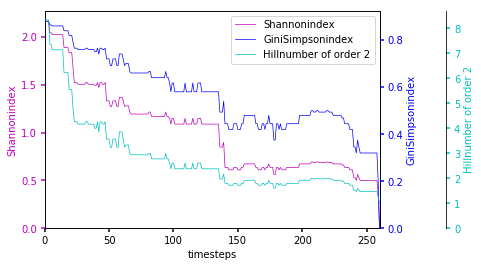

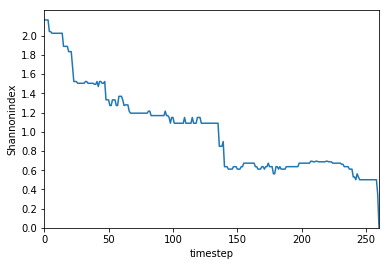

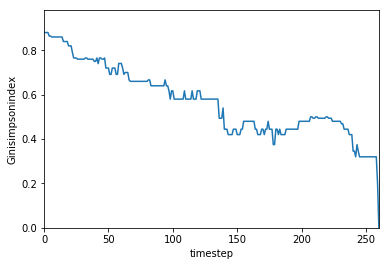

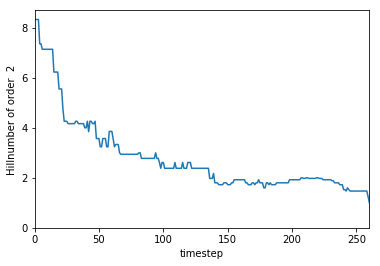

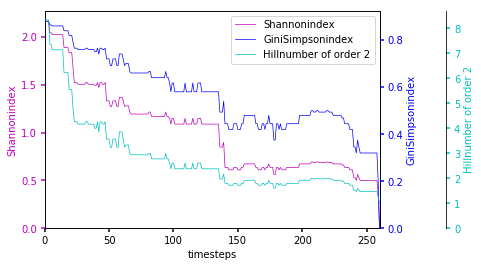

In [31]:
data = np.load('saved_data/'+ '101_0_0476f20_offsprings.npy')
plot_averaged_entropies(sh=result_sh, gi=result_gi, hh=result_hill2, id=variante + '_' + container)
s = entropies(props=data, order=1, off=True, plot=True)[0]
g = entropies(props=data, order=2, off=True, plot=True)
h = hillnumber(props=data, order=2, off=True, plot=True)
plot_averaged_entropies(sh=s, gi=g, hh=h, id=variante + '_' + container)


[1. 1. 1. 1. 1.]
[2. 2. 2. 2. 2. 1. 1. 1.]
